In [ ]:
# old script for trial analysis of random forest and logistic regression
from sklearn.datasets import fetch_openml
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# let us fetch the data
dataset = fetch_openml("ilpd") 
# put into dataframe variable
dataframe = pd.DataFrame(dataset["data"],columns = dataset["feature_names"])
dataframe["target"] = dataset["target"]

/Users/maximilianzeidler/neural_network/lib/python3.7/site-packages/sklearn/datasets/_openml.py:407: UserWarning: Multiple active versions of the dataset matching the name ilpd exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


In [65]:
# quite some inbalances in the dataset
print(dataframe["target"].value_counts())
# let us check for missing values
dataframe.info()
print(167/(416+167))

1    416
2    167
Name: target, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V1      583 non-null    float64 
 1   V2      583 non-null    category
 2   V3      583 non-null    float64 
 3   V4      583 non-null    float64 
 4   V5      583 non-null    float64 
 5   V6      583 non-null    float64 
 6   V7      583 non-null    float64 
 7   V8      583 non-null    float64 
 8   V9      583 non-null    float64 
 9   V10     583 non-null    float64 
 10  target  583 non-null    category
 11  gender  583 non-null    float64 
 12  class   583 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 51.6 KB
0.2864493996569468


In [14]:
# lets check the base mean values ect before building the model
dataframe.describe()

,V1,V3,V4,V5,V6,V7,V8,V9,V10
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [27]:
# here we check for correlation of the dataframes
dataframe.head()
# decode male and female in 0 and 1
dataframe["gender"] = [ float(0) if i == "Male" else float(1) for i in dataframe["V2"]]
dataframe["class"] = dataframe["target"].astype(float)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V1      583 non-null    float64 
 1   V2      583 non-null    category
 2   V3      583 non-null    float64 
 3   V4      583 non-null    float64 
 4   V5      583 non-null    float64 
 5   V6      583 non-null    float64 
 6   V7      583 non-null    float64 
 7   V8      583 non-null    float64 
 8   V9      583 non-null    float64 
 9   V10     583 non-null    float64 
 10  target  583 non-null    category
 11  gender  583 non-null    float64 
 12  class   583 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 51.6 KB


In [36]:
dataframe.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,target,gender,class
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,1.0,1.0
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,0.0,1.0
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,0.0,1.0
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,0.0,1.0
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,0.0,1.0


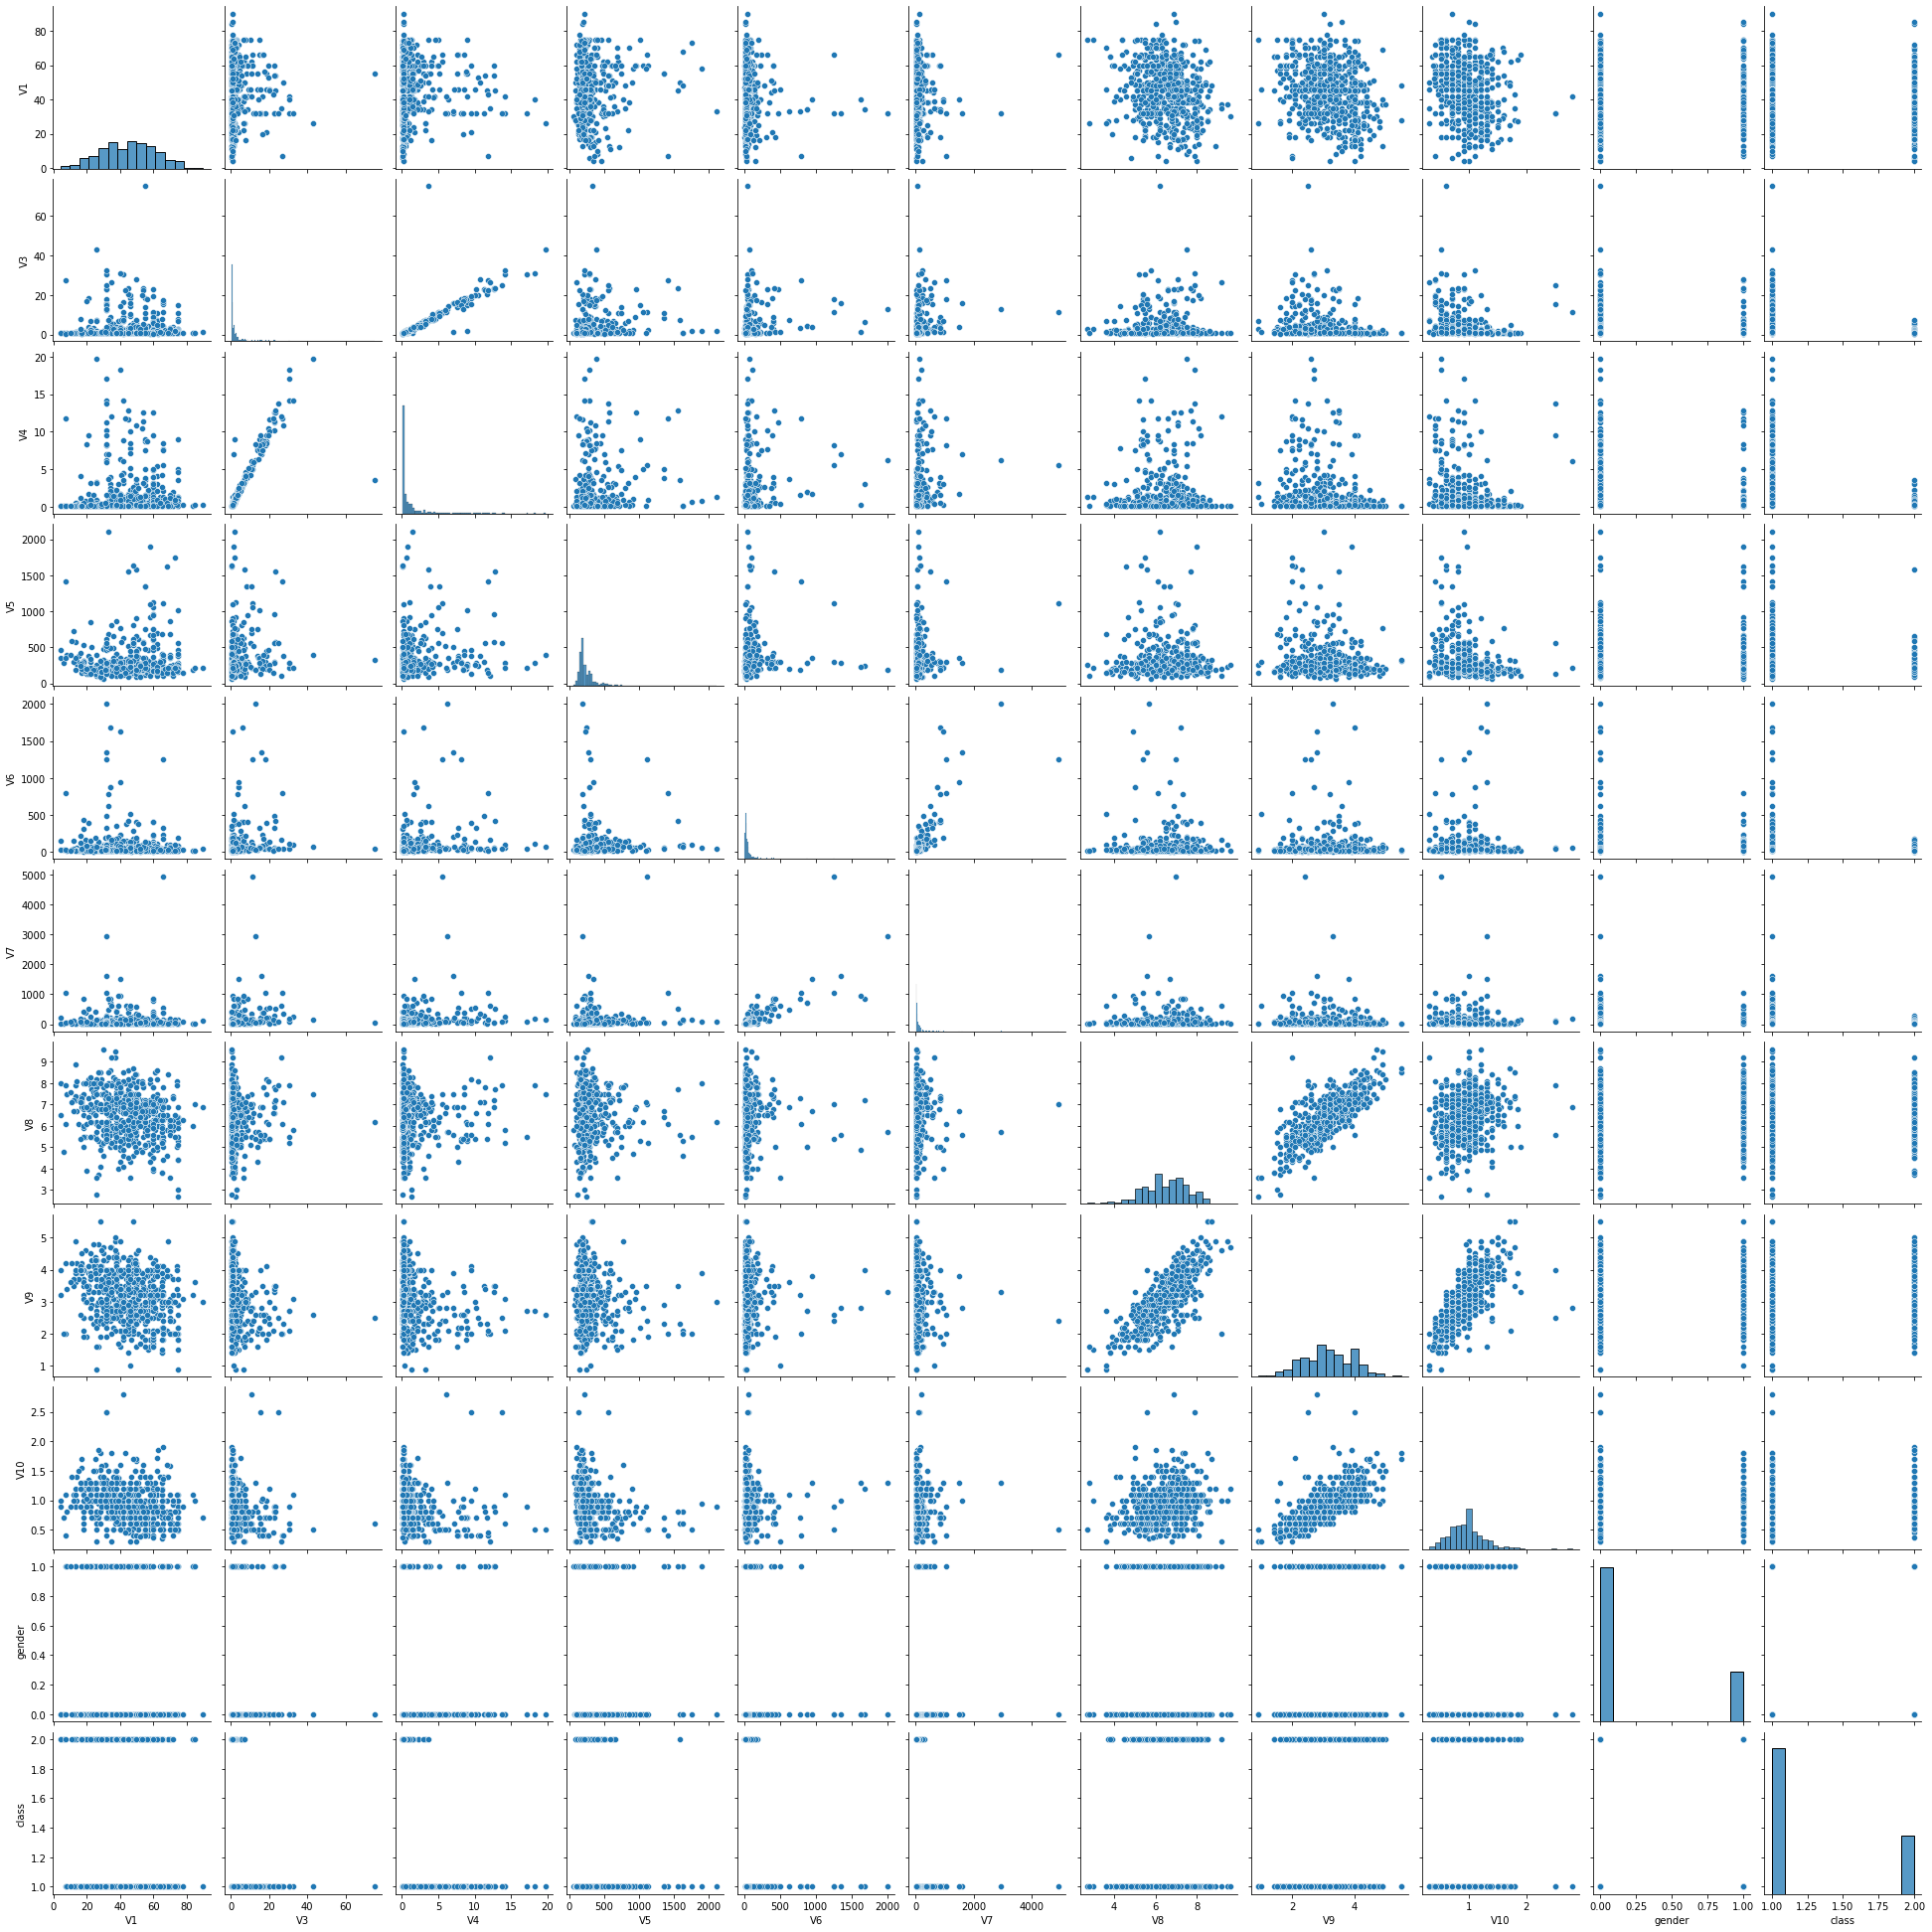

In [37]:
# check the distribution of all the variables
sns.pairplot(dataframe)

<AxesSubplot:>

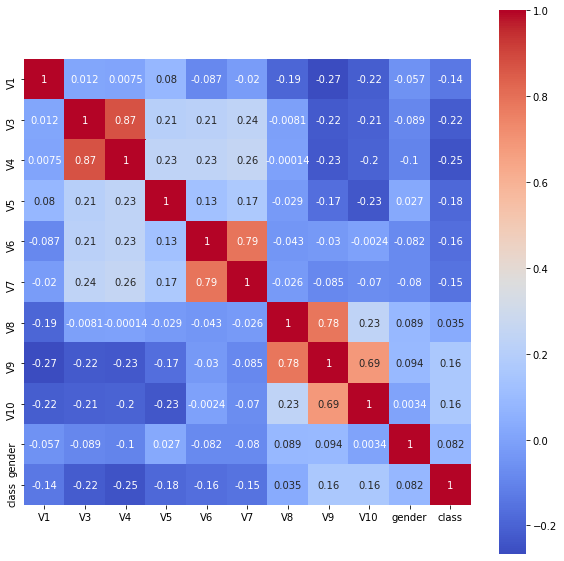

In [35]:
# check the correlation between the variables
corr_dataframe = dataframe.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data = corr_dataframe, annot = True, square = True, cmap = "coolwarm")

In [42]:
# retrieve the data that is ncessary for the analysis
x = dataframe.drop(["V2", "target", "class"], axis = 1).values
y = dataframe["class"]
print(x.shape, y.shape)

(583, 10) (583,)


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# mix the split and shuffle data, why is shuffling important ?
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
scaler = StandardScaler() # this is not necessary for the random forest application
# but for the logistic regression
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [62]:
# run the regression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.7613636363636364


In [59]:
# check the predictions made
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2.,
       1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 2., 1., 1.])

In [63]:
# get the confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[60  1]
 [20  7]]


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

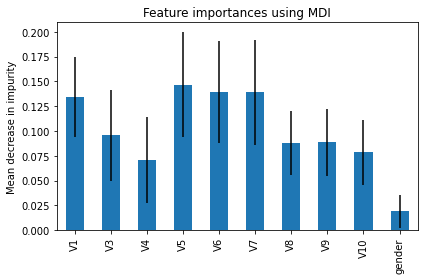

In [87]:
import numpy as np

# run randomforest classifier 
clf = RandomForestClassifier()
train = clf.fit(x_train, y_train)
importances = train.feature_importances_
std = np.std([tree.feature_importances_ for tree in train.estimators_], axis=0)


# make series
forest_importances = pd.Series(importances, index=dataframe.drop(["V2", "target", "class"], axis = 1).columns)
# check the importances of the random forest classifier
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()